# [Kaggle Dataset](https://www.kaggle.com/blastchar/telco-customer-churn)

## Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## Variables explaination

customerID: Customer ID

genderCustomer: gender (female, male)

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

PartnerWhether: the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card 
(automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

# Hypothesis:

 - Important features
   - SeniorCitizen : the more senior the citizen is, less the user will churn
    - tenure: the longer user's tenure is, less the user will churn
    - Contract: user will churn less if user choose two-year contract
    - PaymentMethod: user will churn less if user choose automatic payment
    - MonthlyCharges: the less user monthly charges is, less the user will churn
    - TotalCharges: the higher user total charges is, less the user will churn
    - Total_service_number: the more service user buy, less the user will churn

# Defalut Setting

## Packages

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 150)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#data preprocessing
from sklearn.preprocessing import LabelEncoder
#modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#model evaluate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve,plot_roc_curve, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

## Code Nippest

In [128]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier=None, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('x', 'o', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if classifier:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=np.array([cmap(idx)]),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["Not Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax, values_format='.0f')
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names']) # palette="Blues_d"
    plt.title(model_type + 'FEATURE IMPORTANCE')  
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return plt.show()

def count_plot(data,variable):
    fig, ax = plt.subplots(figsize=(8,10), tight_layout = True)
    count_plot = sns.countplot(data = data, x = variable, palette = 'Paired')

    for p in count_plot.patches:
        total = len(data[variable])
        y = p.get_height()
        x = p.get_x()+p.get_width()/2
        percentage = '{}({:.1f}%)'.format(y,100*y/total)
        count_plot.annotate(percentage, (x,y),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights
    plt.figure(figsize=(10,7))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Features')
    top_weights_selected.plot(kind="bar")
    
    return print("")

## Packages Setting

In [3]:
%matplotlib inline
plt.rcParams['font.family'] = 'Arial'
plt.rc('font',size=12)
plt.style.use('ggplot')

## Import Dataset

In [4]:
df = pd.read_csv(r'.\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Overviewing
進一步看各變數的狀態，可以發現資料中沒有遺失值，在處理上相對方便，而Churn便是這次要預測的主要目標

In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No
7039,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
7040,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
7041,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
7042,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Insight
- TotalCharges為0者皆為新用戶，因為首期帳單還沒付

In [8]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
5,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
6,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
7,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
8,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
9,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Missing-Value

In [9]:
# TotalCharges 補0
df['TotalCharges'].fillna(value=0, inplace = True)

### Grouping Variables
- categoical: Tenure -> Tenure group
    - 0-12month為新用戶群，佔整體用戶約30%
    - 60month以上為老用戶群，佔整理用戶約20%

In [10]:
df_tenure_count = df.groupby('tenure').count().iloc[:,:1]

In [11]:
df_tenure_count['cumsum'] = df_tenure_count.cumsum()
df_tenure_count['cumsum_percentage'] = df_tenure_count['cumsum']/df_tenure_count['customerID'].sum()*100

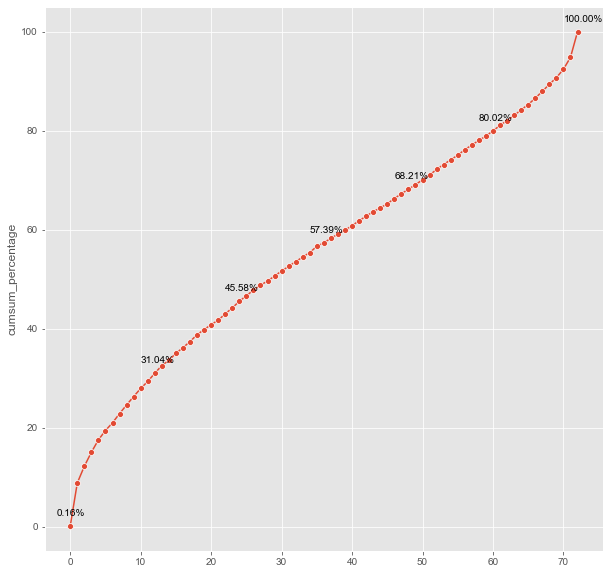

In [12]:
fig, axes = plt.subplots(figsize = (10,10))
# ax2 = df_tenure_count.plot(use_index=True, y='cumsum_percentage', marker='D', color="C1", kind='line', ax=axes)
ax3 = sns.lineplot(data = df_tenure_count, x = df_tenure_count.index.values, y = 'cumsum_percentage', marker = 'o')

for num_dict in zip(df_tenure_count.index.values,df_tenure_count.cumsum_percentage):
    if num_dict[0] % 12 == 0 :
        ax3.text(num_dict[0]-2,  num_dict[1]+2, '{:.2f}%'.format(num_dict[1]))

In [13]:
df['label'] = pd.cut(df['tenure'],[-1,12,24,36,48,60,100], labels = ['0-12','12-24','24-36','36-48','48-60','60up'])

In [14]:
telecom_serive = []

for col in df.columns[6:15]:
    telecom_serive.append(col)

In [15]:
df['Total_service_number'] = (df[telecom_serive] == ('Yes' or 'DSL' or'Fiber optic')).sum(axis = 1)

In [16]:
df['auto_payment'] = df[['PaymentMethod']] == ('Credit card (automatic)' or 'Bank transfer (automatic)')

In [17]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [18]:
# replicate a dateset to do further analysis
df_tele = df.copy()

In [19]:
df_tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label,Total_service_number,auto_payment
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No,0-12,4,False
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.25,0.0,No,0-12,1,False
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Two year,No,Mailed check,80.85,0.0,No,0-12,6,False
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.75,0.0,No,0-12,2,False
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,No,Two year,No,Credit card (automatic),56.05,0.0,No,0-12,5,True


In [20]:
df_tele.drop(columns = ['customerID'], inplace = True)

# Exploratory Data Analysis

## Insights
- Churn: 是否流失的比例差很多，後續考慮over-sampling
- Gender: 男女比差不多
- Partner: 有沒有伴侶的比例差不多，沒有的人多一些
- dependents: 有沒有家人的比例差不多，沒有的人多一些
- phoneservice: 是否有開通電話服務，大部分都有

## Target Varibles

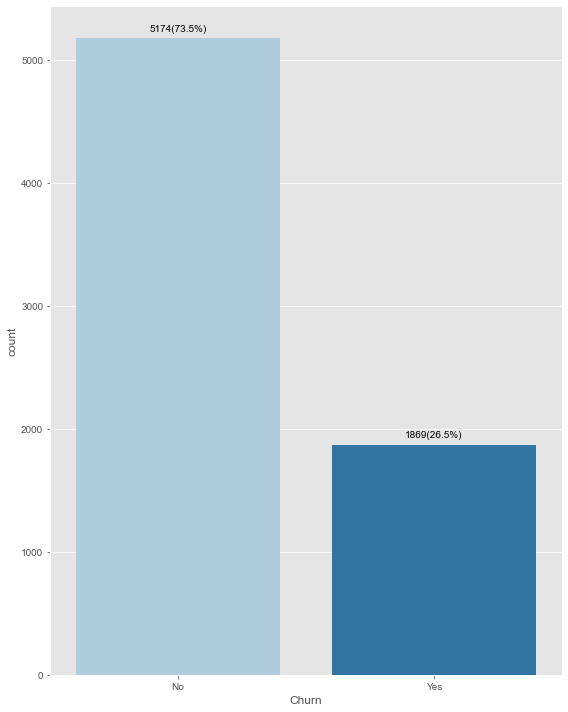

In [21]:
count_plot(df_tele, 'Churn')

## Predictor Variables

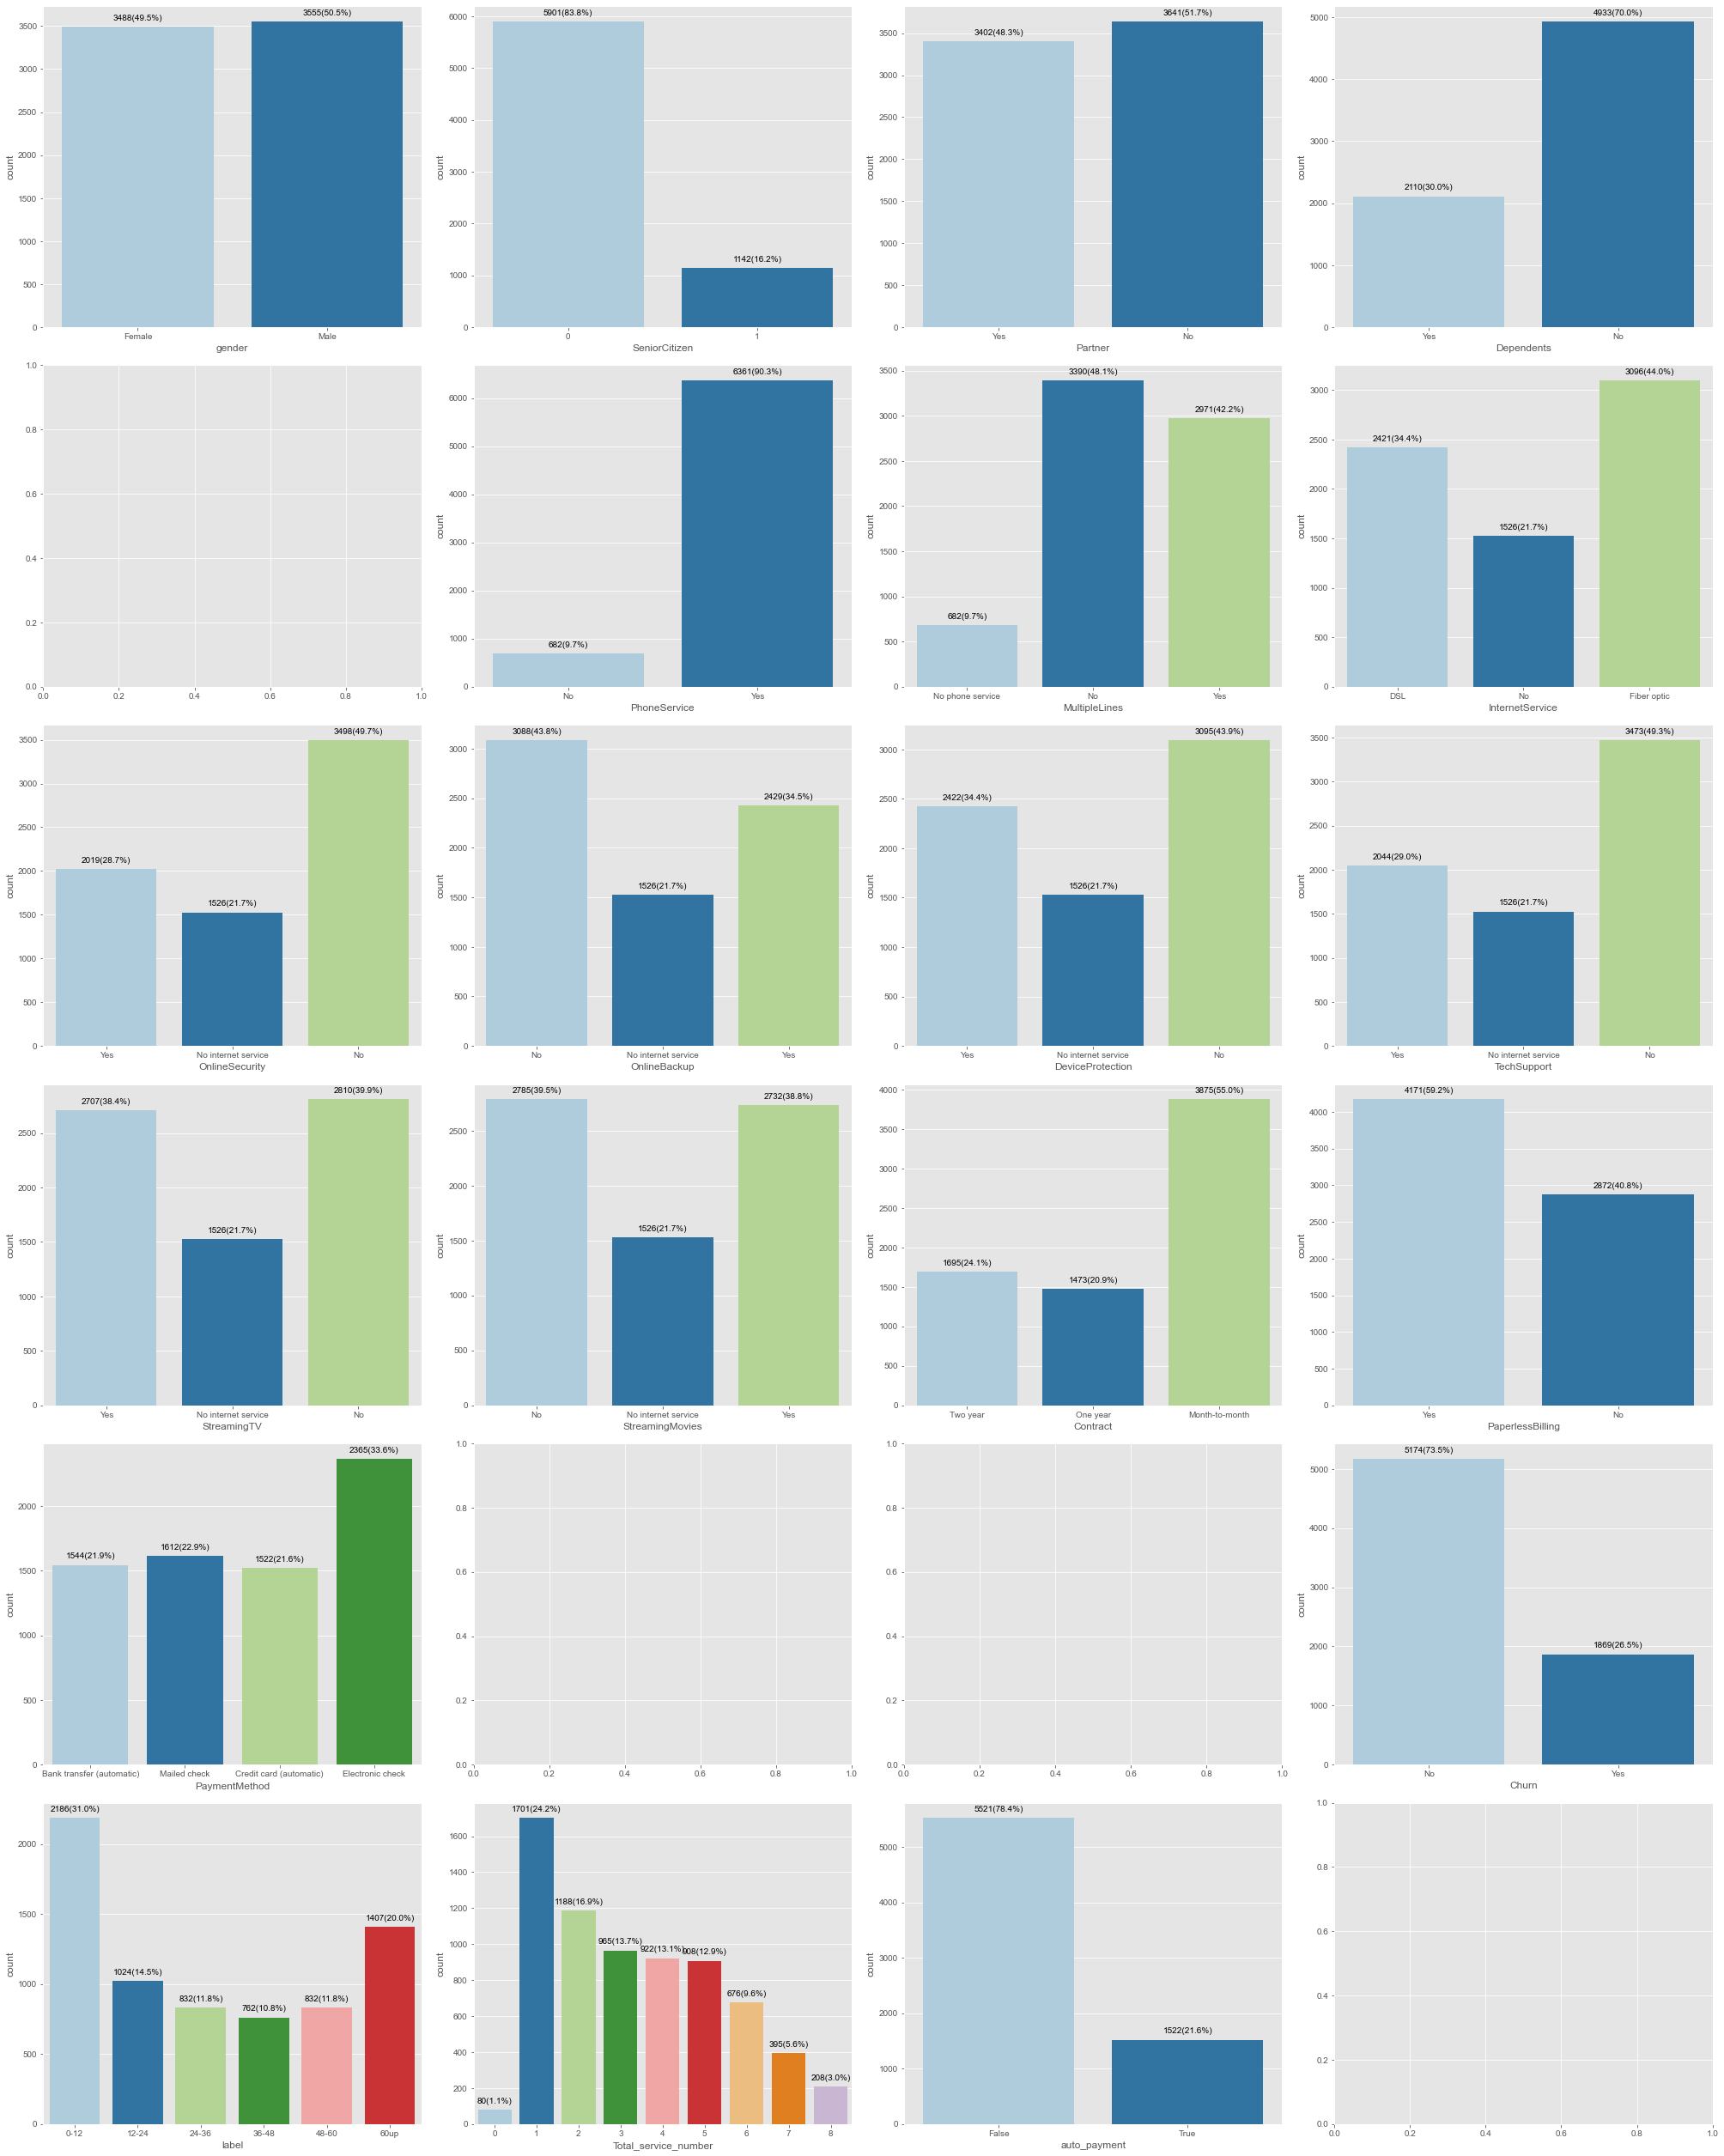

In [22]:
# draw the count plot for each category variable
cont_var =['tenure', 'MonthlyCharges', 'TotalCharges']
n_rows = 6
n_cols = 4
fig, axes = plt.subplots(n_rows,n_cols, figsize=(28, 35), tight_layout = True)
for num, var in enumerate(df_tele.columns[0:]):
    if var not in cont_var:
        Tcountplot = sns.countplot(ax=axes[num//n_cols,num%n_cols],x = var, data = df, palette='Paired')
    #加入圖表數值
        for p in Tcountplot.patches:
            total = len(df_tele[var])
            y = p.get_height()
            x = p.get_x()+p.get_width()/2
            percentage = '{}({:.1f}%)'.format(y,100*y/total)
            Tcountplot.annotate(percentage, (x,y),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Distribution of Continuous Variables

### Insights
- 流失都發生在早期階段，可能是在產品或服務給予用戶的體驗不佳導致迅速流失
- 流失者月平均花費在60-80元，具有高度價值，若能挽留這些用戶能帶動整體營收快速上升
- 總花費越高者越不易流失，因此目標可以將重心放在新用戶的留存

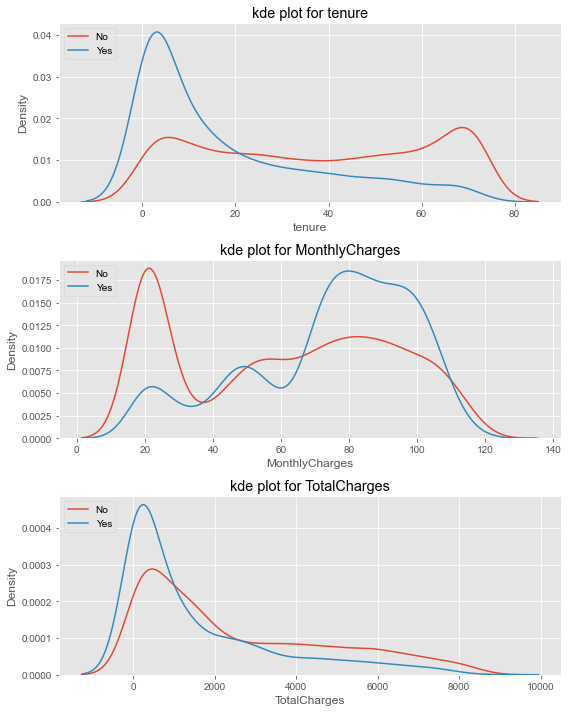

In [23]:
n_rows = 3
n_cols = 1
fig, axes = plt.subplots(n_rows,n_cols, figsize=(8, 10))

for num, var in enumerate(cont_var):
    sns.kdeplot(df_tele[df_tele['Churn'] == 'No'][var],ax = axes[num//n_cols], label = 'No')
    sns.kdeplot(df_tele[df_tele['Churn'] == 'Yes'][var],ax = axes[num//n_cols], label = 'Yes')
    axes[num//n_cols].set_title('kde plot for {}'.format(var))
    axes[num//n_cols].legend(loc = 'upper left')
    plt.tight_layout()

## Correlaton Between Variables
### Insights

Total_Charges ~= Monthly_charge * Tenure

- Total_charges 和Tenure 、 MonthlyCharge有高度正相關

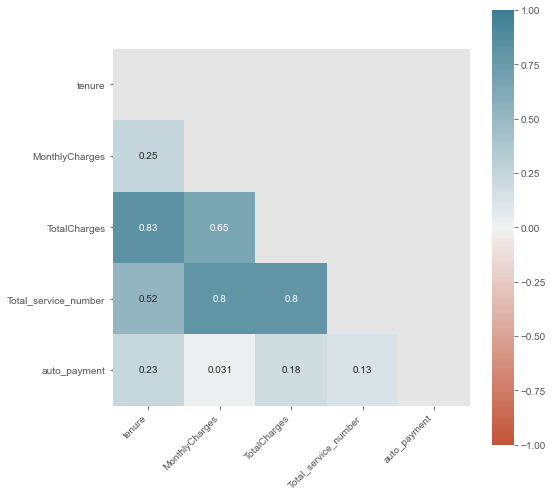

In [24]:
correlation_mat = df_tele.corr()

# crate upper trianble matrix
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (8,8))

ax = sns.heatmap(
    correlation_mat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    mask = mask,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
#使用seaborn繪製多變量圖
# sns.pairplot(df) 

### ~~看類別變數與Monthly_Charges的關係~~

In [26]:
# cat_var =['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','Churn']
# fig, axes = plt.subplots(5,3, figsize=(16, 20))
# # fig.suptitle('Variables count' , fontsize = 20)
# ax_x = 0
# ax_y = 0
# for var in df.columns[0:-1]:
#     if var not in cat_var:
#         sns.barplot(ax=axes[ax_x,ax_y], x = var, y = 'MonthlyCharges' , data = df, palette='Paired')
#         ax_y = ax_y + 1
#         if ax_y % 3 == 0:
#             ax_x = ax_x + 1
#             ax_y = 0

### Observe Correlation Between Variables and Churn

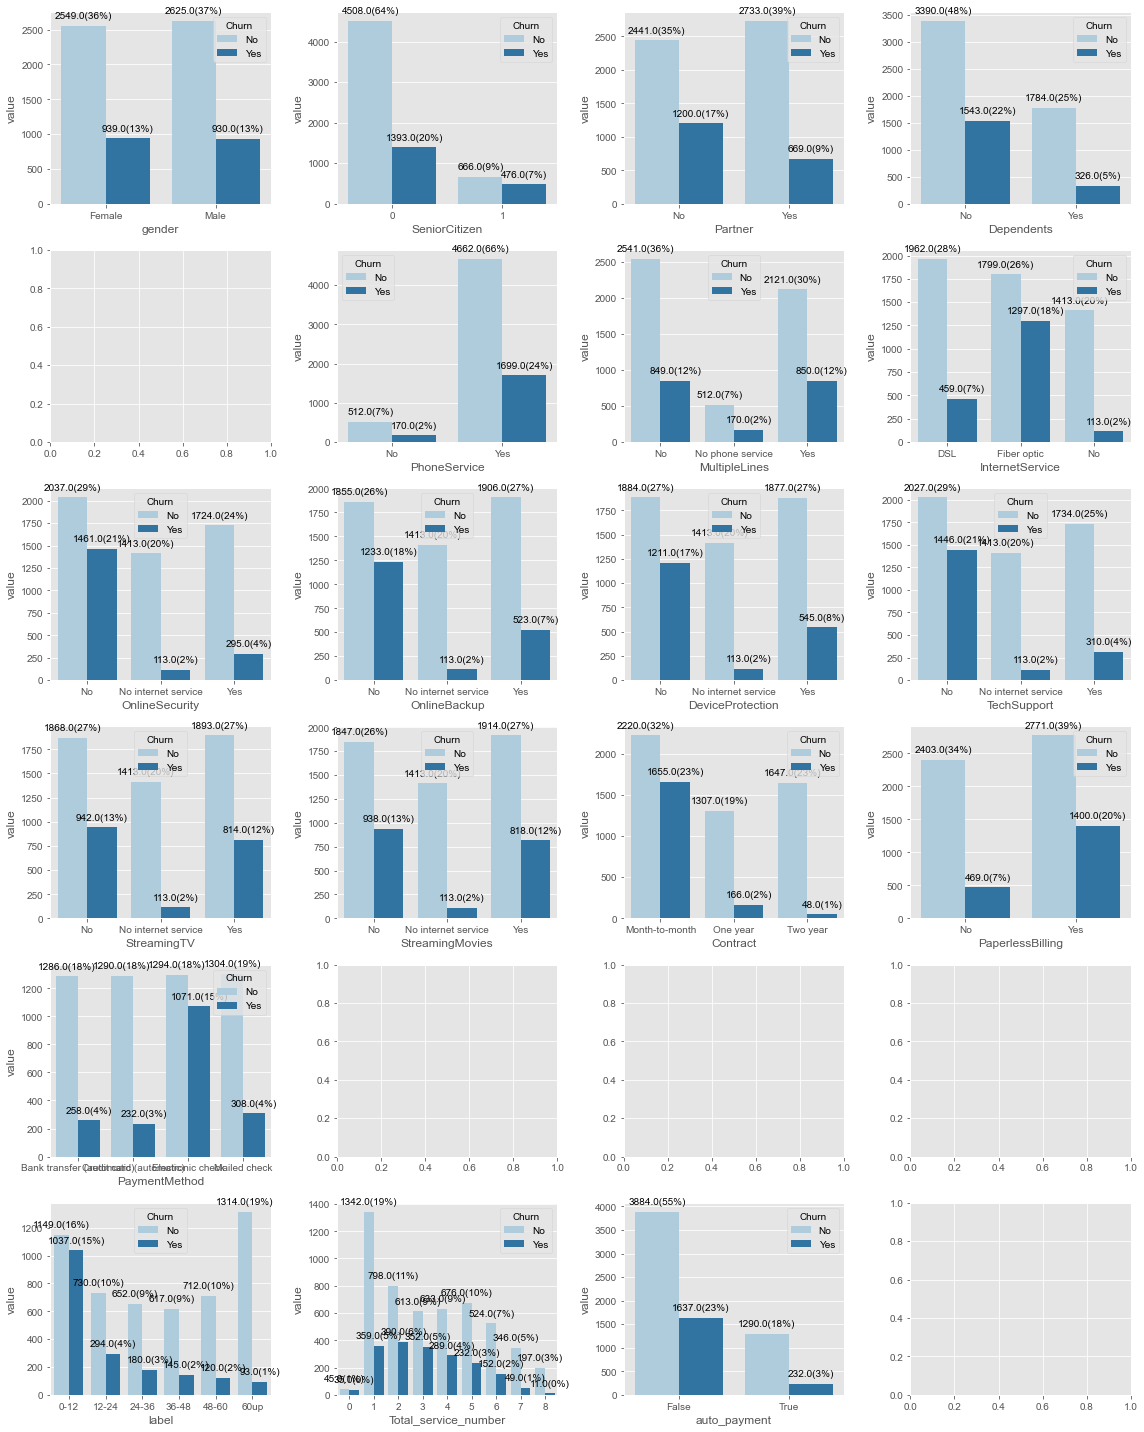

In [27]:
n_rows = 6
n_cols = 4
fig, axes = plt.subplots(n_rows,n_cols, figsize=(16, 20))
# fig.suptitle('Variables count' , fontsize = 20)
for num, var in enumerate(df_tele.columns[0:]):
    if var not in cont_var and var != 'Churn':
        ct = pd.crosstab(df_tele[var], df_tele['Churn'])
        # now stack and reset
        stacked = ct.stack().reset_index().rename(columns={0:'value'})
        # plot grouped bar chart
        bar_plot = sns.barplot(ax=axes[num//n_cols,num%n_cols], x=stacked[var], y=stacked.value, hue=stacked.Churn, palette='Paired')

        for p in bar_plot.patches:
            total = len(df_tele[var])
            y = p.get_height()
            x = p.get_x()+p.get_width()/2
            percentage = '{}({:.0f}%)'.format(y,100*y/total)
            bar_plot.annotate(percentage, (x,y),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

        plt.tight_layout()


### Chi-Squre test

In [28]:
ct = pd.crosstab(df['Contract'], df['Churn'])
stacked = ct.stack().reset_index().rename(columns={0:'value'})

In [29]:
import scipy.stats # 載入要做統計分析的套件

sig_factors = []

for var in df_tele.columns[0:-1]:
    if (var not in cont_var) and (var != 'Churn'):
        ct = pd.crosstab(df_tele[var], df_tele['Churn'])
        # now stack and reset
        stacked = ct.stack().reset_index().rename(columns={0:'value'})

        chi_results = scipy.stats.chi2_contingency(ct.values, correction = True) 
        chi_stat = chi_results[0]
        p_value = chi_results[1]
        degree_freedom = chi_results[2]

        print('Varibles : {}\n'.format(var))
        print(f'chi: {chi_stat},\np:   {round(p_value,3)},\ndf:  {chi_results},\nexpected: \n{degree_freedom}')
        print('-'*20)

        if p_value < 0.05:
            sig_factors.append(var)

Varibles : gender

chi: 0.4840828822091383,
p:   0.487,
df:  (0.4840828822091383, 0.48657873605618596, 1, array([[2562.38989067,  925.61010933],
       [2611.61010933,  943.38989067]])),
expected: 
1
--------------------
Varibles : SeniorCitizen

chi: 159.42630036838742,
p:   0.0,
df:  (159.42630036838742, 1.510066805092378e-36, 1, array([[4335.05239245, 1565.94760755],
       [ 838.94760755,  303.05239245]])),
expected: 
1
--------------------
Varibles : Partner

chi: 158.7333820309922,
p:   0.0,
df:  (158.7333820309922, 2.1399113440759935e-36, 1, array([[2674.78830044,  966.21169956],
       [2499.21169956,  902.78830044]])),
expected: 
1
--------------------
Varibles : Dependents

chi: 189.12924940423474,
p:   0.0,
df:  (189.12924940423474, 4.9249216612154196e-43, 1, array([[3623.93042737, 1309.06957263],
       [1550.06957263,  559.93042737]])),
expected: 
1
--------------------
Varibles : PhoneService

chi: 0.9150329892546948,
p:   0.339,
df:  (0.9150329892546948, 0.33878253580669

### T test

In [30]:
from scipy.stats import ttest_ind

cat_churn = df_tele[df_tele['Churn'] == 'Yes']
cat_not_churn = df_tele[df_tele['Churn'] == 'No']

for var in cont_var:
    print(ttest_ind(cat_churn[var], cat_not_churn[var]))
    p_value = ttest_ind(cat_churn[var], cat_not_churn[var])[1]
    if p_value < 0.05:
        sig_factors.append(var)

Ttest_indResult(statistic=-31.57955051135377, pvalue=7.99905796059022e-205)
Ttest_indResult(statistic=16.53673801593631, pvalue=2.706645606888261e-60)
Ttest_indResult(statistic=-16.97877972712443, pvalue=2.1272116132407585e-63)


# Data preproccessing

## Trun The Churn To 1 or 0

In [31]:
yes_no_changed = {
    "Yes" : 1,
    "No" : 0
}

In [32]:
df_tele['Churn'] = df_tele['Churn'].map(yes_no_changed)

## Labeling /OH Encoding

In [33]:
bin_var = []
cat_var = []

# binary varibales

# bin_var = [i for i in df_tele.columns if df_tele[i].nunique() == 2]
# cat_var = [i for i in df_tele.columns if i not in (bin_var and cont_var)]

for i in df_tele.columns:
    if df_tele[i].nunique() == 2:
        bin_var.append(i)
    elif i not in (bin_var and cont_var):
        cat_var.append(i)

# categorical variables
# continues variables

In [34]:
df_tele = pd.get_dummies(data = df_tele, columns = cat_var, drop_first = True) # turn into dummiues

le = LabelEncoder() # labeling
for i in bin_var :
    df_tele[i] = le.fit_transform(df_tele[i])

## Making Copy Dataset For Tree Based Model / Regression Model

In [35]:
df_reg = df_tele.copy()
df_tree = df_tele.copy()

# Modeing

### making train/test Split

In [60]:
target_col = ['Churn']

X = df_tree.drop(['Churn'], axis = 1)
y = df_tree[target_col]
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=42)

### baseline model(decision tree)

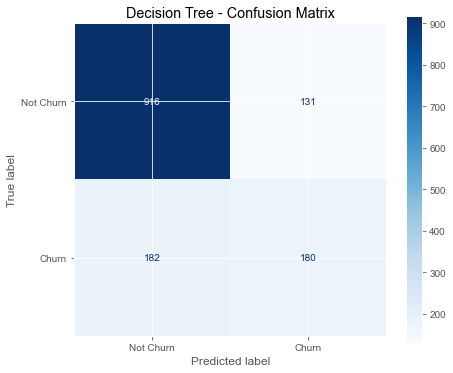

Accuracy Score Test: 0.7778566359119943
Accuracy Score Train: 0.8129215477458289 (as comparison)



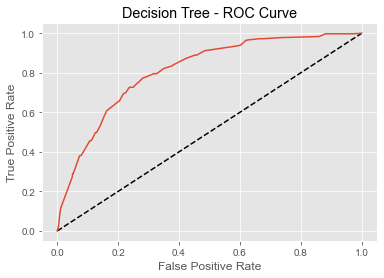

AUC Score (ROC): 0.8115531352403869

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1047
           1       0.58      0.50      0.53       362

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.69      1409
weighted avg       0.77      0.78      0.77      1409



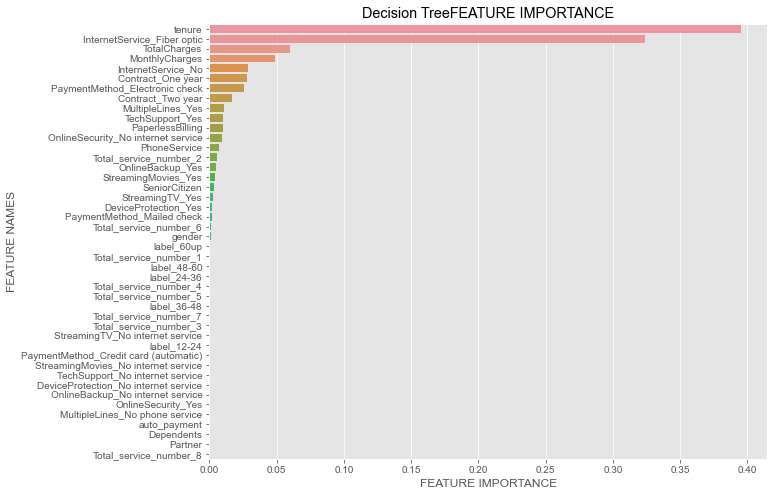

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train_tree, y_train_tree)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_dt = dt.predict(X_test_tree)
y_pred_dt_prob = dt.predict_proba(X_test_tree)

# Evaluation
confusion_matrix_plot(X_train_tree, y_train_tree, X_test_tree, y_test_tree, dt, y_pred_dt, 'Decision Tree')
roc_curve_auc_score(X_test_tree, y_test_tree, y_pred_dt_prob, 'Decision Tree')
print(classification_report(y_test_tree, y_pred_dt))
plot_feature_importance(dt.feature_importances_, X_train_tree.columns,'Decision Tree')

### oversampling with SMOTE algorithm

In [62]:
from imblearn.over_sampling import SMOTE

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2 ,random_state = 42)

#oversampling minority class using smote
os = SMOTE(random_state = 42)
X_os_smote, y_os_smote = os.fit_sample(X_train, y_train)

cols = X.columns
X_os_smote = pd.DataFrame(data = X_os_smote, columns=cols)
y_os_smote = pd.DataFrame(data = y_os_smote, columns=target_col)

## Tree-Based model

### decision tree

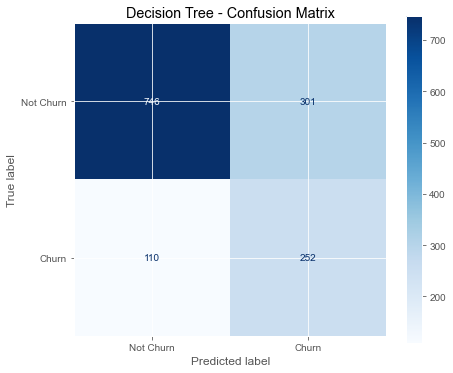

Accuracy Score Test: 0.7083037615330021
Accuracy Score Train: 0.814150714804943 (as comparison)



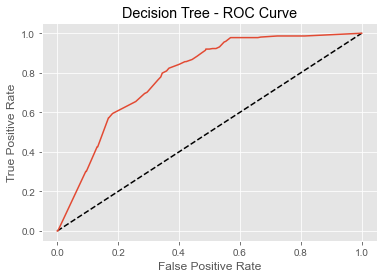

AUC Score (ROC): 0.7871424274565055

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1047
           1       0.46      0.70      0.55       362

    accuracy                           0.71      1409
   macro avg       0.66      0.70      0.67      1409
weighted avg       0.76      0.71      0.72      1409



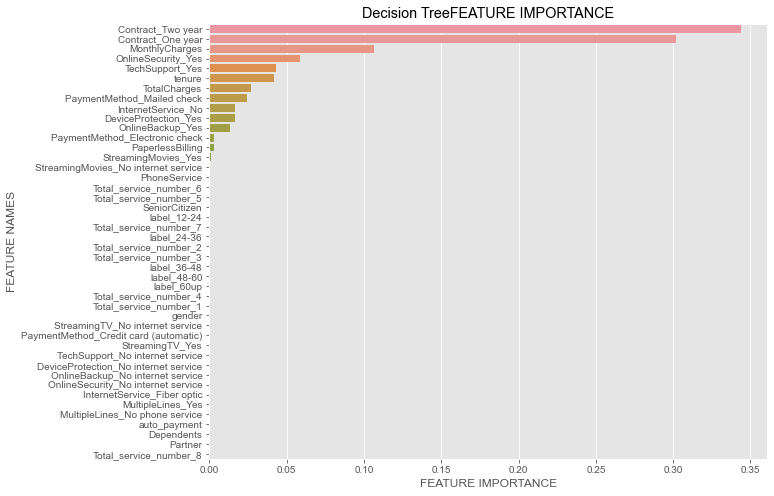

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_os_smote, y_os_smote)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_dt = dt.predict(X_test)
y_pred_dt_prob = dt.predict_proba(X_test)

# Evaluation
confusion_matrix_plot(X_os_smote, y_os_smote, X_test, y_test, dt, y_pred_dt, 'Decision Tree')
roc_curve_auc_score(X_test, y_test, y_pred_dt_prob, 'Decision Tree')
print(classification_report(y_test, y_pred_dt))
plot_feature_importance(dt.feature_importances_, X_train_tree.columns,'Decision Tree')

### random forest

C:\Users\rex51\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


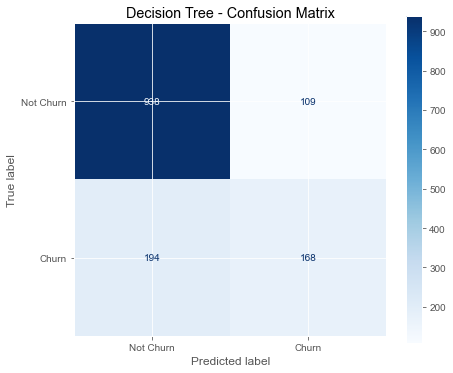

Accuracy Score Test: 0.7849538679914834
Accuracy Score Train: 0.9976925807596734 (as comparison)



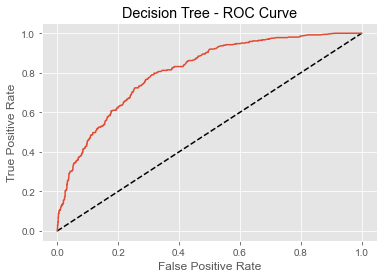

AUC Score (ROC): 0.8075730711794287

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1047
           1       0.61      0.46      0.53       362

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



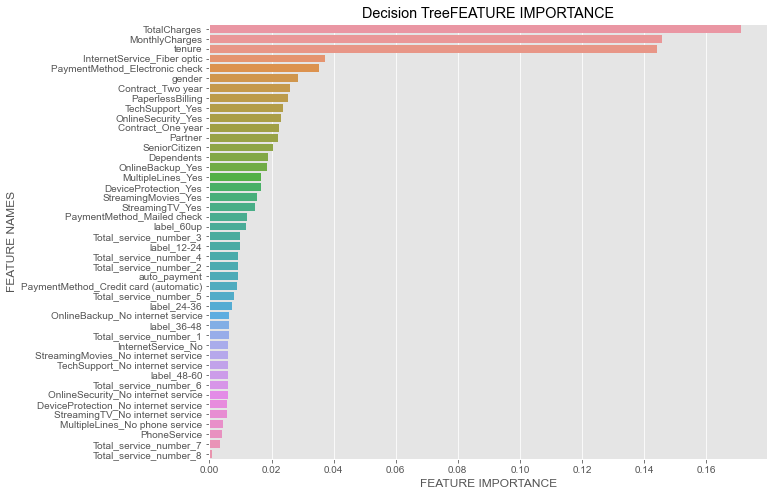

In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score

#set up the classifier
rfModel = RandomForestClassifier(n_estimators=1000,random_state=42)
rfModel.fit(X_train_tree,y_train_tree)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rfModel.predict(X_test_tree)
y_pred_rf_prob = rfModel.predict_proba(X_test_tree)

# Evaluation
confusion_matrix_plot(X_train_tree, y_train_tree, X_test_tree, y_test_tree, rfModel, y_pred_rf, 'Decision Tree')
roc_curve_auc_score(X_test_tree, y_test_tree, y_pred_rf_prob, 'Decision Tree')
print(classification_report(y_test_tree, y_pred_rf))
plot_feature_importance(rfModel.feature_importances_, X_train_tree.columns,'Decision Tree')


#evaluate
# print('正解率(train): {:.3f}'.format(rfModel.score(X_os_smote, y_os_smote)))
# print('正解率(test):  {:.3f}'.format(rfModel.score(X_test, y_test)))

# y_test = y_test_tree.astype('int')
# y_pred_rf = y_pred_rf.astype('int')
# 把True/False改成1/0，才能對比正確性

# print('精確率: {:.3f}'.format(precision_score(y_test, y_pred_rf)))
# print('召回率: {:.3f}'.format(recall_score(y_test, y_pred_rf)))
# print('F1分數: {:.3f}'.format(f1_score(y_test, y_pred_rf)))

# y_pred = rfModel.predict(X_test)
# cm = confusion_matrix(y_test, y_pred_rf)
# print(classification_report(y_test, y_pred_xgb))

# confusion_matrix_plot(X_os_smote,y_os_smote,X_test, y_test, rfModel, y_pred_rf, 'Random Forest' )
# roc_curve_auc_score(X_test, y_test, rfModel.predict_proba(X_test),'Random Forest')

# plot_feature_importance(rfModel.feature_importances_, X_train_tree.columns,'Random Forest')

### XGboost

C:\Users\rex51\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:41:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




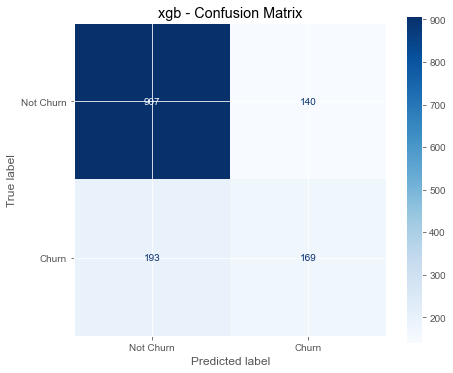

Accuracy Score Test: 0.7636621717530163
Accuracy Score Train: 0.9769258075967341 (as comparison)



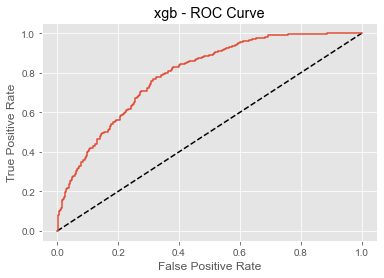

AUC Score (ROC): 0.7922266723656646

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1047
           1       0.61      0.46      0.53       362

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



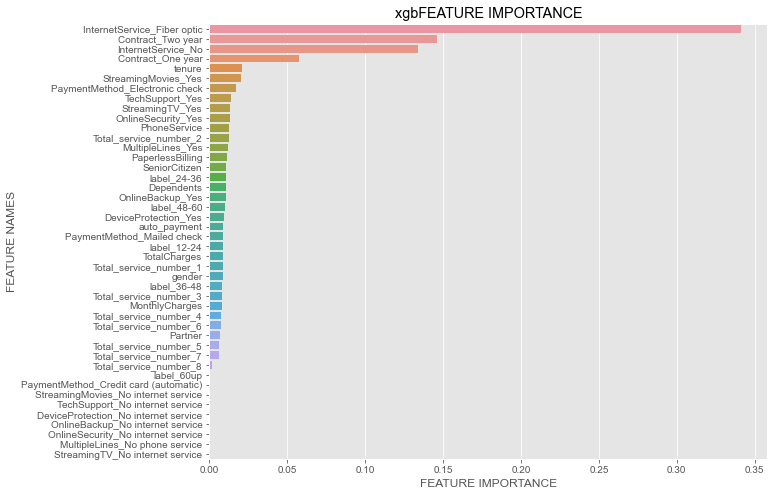

In [115]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                    max_depth = 5, min_child_weight=1, missing=None, n_estimators=1000,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


y_pred_xgb = xgb.fit(X_train_tree, y_train_tree)
y_pred_xgb_prob = xgb.predict_proba(X_test_tree)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_xgb = xgb.predict(X_test_tree)
y_pred_xgb_prob = xgb.predict_proba(X_test_tree)

# Evaluation
confusion_matrix_plot(X_train_tree, y_train_tree, X_test_tree, y_test_tree, xgb, y_pred_xgb, 'xgb')
roc_curve_auc_score(X_test_tree, y_test_tree, y_pred_xgb_prob, 'xgb')
print(classification_report(y_test_tree, y_pred_rf))
plot_feature_importance(xgb.feature_importances_, X_os_smote.columns,'xgb')

## regresson model

### logit regression

In [116]:
X = df_reg.drop(['Churn'], axis = 1)
y = df_reg['Churn']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
#oversampling minority class using smote
# sm = SMOTE(random_state = 42)
# X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

# cols = X.columns
# X_train_sm = pd.DataFrame(data = X_train_sm, columns=cols)
# y_train_sm = pd.DataFrame(data = y_train_sm, columns=target_col)

# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

Before OverSampling, counts of label '1': 1323
Before OverSampling, counts of label '0': 3607 

After OverSampling, the shape of train_X: (7214, 44)
After OverSampling, the shape of train_y: (7214,) 

After OverSampling, counts of label '1': 3607
After OverSampling, counts of label '0': 3607


In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_reg[cont_var] = sc.fit_transform(X_train_reg[cont_var])
X_test_reg[cont_var] = sc.transform(X_test_reg[cont_var])

# for i in cont_var:
#     X_train[i] = sc.fit_transform(X_train[i])
#     X_test[i] = sc.transform(X_test[i])

C:\Users\rex51\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\rex51\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\rex51\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [118]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_reg, y_train_reg)

C:\Users\rex51\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [119]:
y_pred = classifier.predict(X_test_reg)

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_reg, y_pred)
cm

array([[1403,  164],
       [ 257,  289]], dtype=int64)

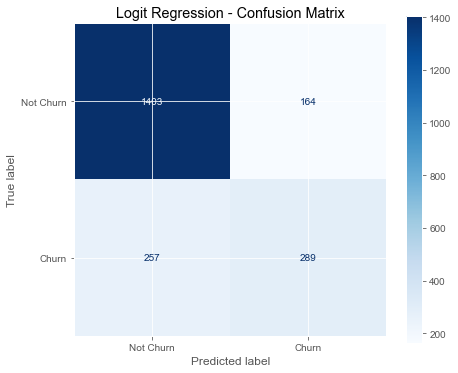

Accuracy Score Test: 0.8007572172266919
Accuracy Score Train: 0.8097363083164301 (as comparison)



In [123]:
confusion_matrix_plot(X_train_reg,y_train_reg,X_test_reg, y_test_reg, classifier, y_pred, 'Logit Regression' )

In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('精確率: {:.3f}'.format(precision_score(y_test_reg, y_pred)))
print('召回率: {:.3f}'.format(recall_score(y_test_reg, y_pred)))
print('F1分數: {:.3f}'.format(f1_score(y_test_reg, y_pred)))

精確率: 0.638
召回率: 0.529
F1分數: 0.579


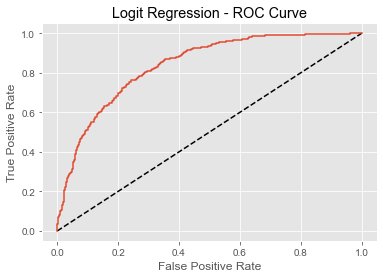

AUC Score (ROC): 0.8379804624220706



In [125]:
roc_curve_auc_score(X_test_reg, y_test_reg, classifier.predict_proba(X_test_reg),'Logit Regression')

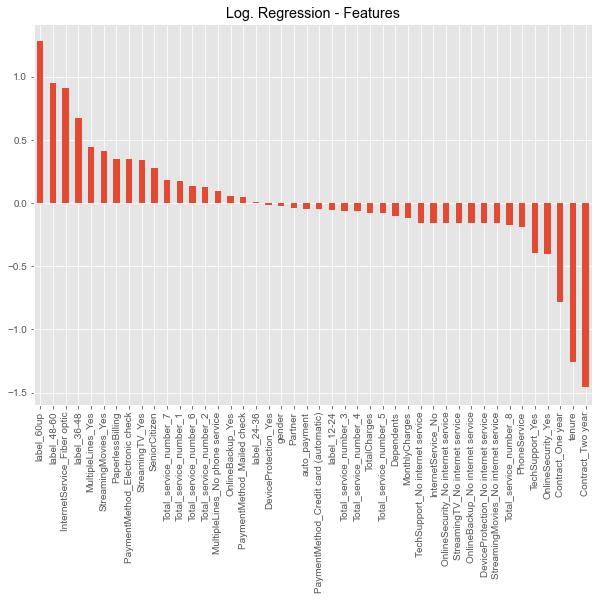

In [131]:
feature_weights(X_train_reg, classifier, 'Log. Regression')